In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read data for EMDB
df = pd.read_csv('EM_Data_April2019.csv', index_col=0)

#remove columns (Status, Entry_Title, Deposit_Date, Detector, Energy_Filter, Citation_Authors)
df.drop(["Status", "Deposit_Date", 'Entry_Title', 'Energy_Filter'], axis=1, inplace=True)
del df['Citation_Authors']   #also del can be used
del df['Detector']          # to delete one column at a time

#remove null entries for Resolution
df = df[df['Resolution'].notnull()]
#df.dropna(subset=['Resolution'], inplace=True)  #You may use this method. subset: columns to use for verification

#add a year column extracted from Map_Release column
df['Year'] = pd.DatetimeIndex(df['Map_Release']).year

#remove 2019 entries
df = df[df['Year']!=2019]

#read PDB data
df2 = pd.read_csv("PDB_Data_April2019.csv")


In [3]:
# part a
print("\n\npart a\n")
print("=== df.info() ===");df.info()
print("\n=== df.columns ===\n", df.columns)
print("\n=== df.index ===\n", df.index)
print("\n=== df2.columns ===\n", df2.columns)
print("\n=== df2.index ===\n", df2.index)



part a

=== df.info() ===
<class 'pandas.core.frame.DataFrame'>
Index: 6964 entries, EMD-0001 to EMD-9733
Data columns (total 8 columns):
Entry_Authors     6964 non-null object
Map_Release       6964 non-null object
Resolution        6964 non-null float64
Method            6964 non-null object
Associated_PDB    2662 non-null object
Citation_Year     6804 non-null float64
Journal           6964 non-null object
Year              6964 non-null int64
dtypes: float64(2), int64(1), object(5)
memory usage: 489.7+ KB

=== df.columns ===
 Index(['Entry_Authors', 'Map_Release', 'Resolution', 'Method',
       'Associated_PDB', 'Citation_Year', 'Journal', 'Year'],
      dtype='object')

=== df.index ===
 Index(['EMD-0001', 'EMD-0002', 'EMD-0008', 'EMD-0009', 'EMD-0010', 'EMD-0011',
       'EMD-0012', 'EMD-0013', 'EMD-0014', 'EMD-0015',
       ...
       'EMD-9666', 'EMD-9667', 'EMD-9674', 'EMD-9675', 'EMD-9677', 'EMD-9678',
       'EMD-9680', 'EMD-9682', 'EMD-9694', 'EMD-9733'],
      dtype='obj

In [4]:
#part b
print("\n\npart b")
#get the counting for entries
sCounting = df["Method"].value_counts()
print("\tThe most method used is",sCounting.index[0], " and it was used {} times.".format(sCounting[0]))
print("\tThe second most method used is",sCounting.index[1], " and it was used {} times.".format(sCounting[1]))



part b
	The most method used is singleParticle  and it was used 5443 times.
	The second most method used is subtomogramAveraging  and it was used 634 times.


In [5]:
#part c
print("\n\npart c")
#return a df contains the two columns (Entry_Authors and Year)
author_year2018 = df[df["Year"]==2018][["Entry_Authors", "Year"]]
AbidAli_mask = author_year2018['Entry_Authors'].map(lambda x: x.find("Abid Ali"))    #returns -1 if not found
print("\t",author_year2018[AbidAli_mask!=-1].index[0])
#Another way
'''
print(author_year2018[author_year2018.Entry_Authors.str.find("Abid Ali")!=-1].index[0])
'''
#A third method 
'''
AbidAli = df[df['Entry_Authors'].str.contains("Abid Ali")]         #returns a dataframe for Entry_authors that contains Abid Ali
print((AbidAli["Year"]==2018).index[0])
'''



part c
	 EMD-0288


'\nAbidAli = df[df[\'Entry_Authors\'].str.contains("Abid Ali")]         #returns a dataframe for Entry_authors that contains Abid Ali\nprint((AbidAli["Year"]==2018).index[0])\n'


part d


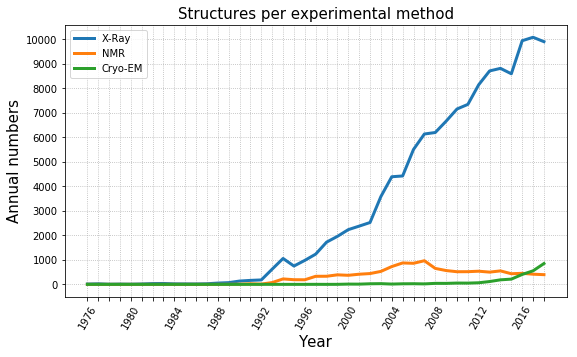

'\ndf2[[\'Year\', \'X-ray_annually\', \'NMR_annually\', \'Cryo_annually\']].plot.line(x=\'Year\', linewidth=3.0)\nplt.xticks(xCoord, xLabels, rotation=60)\nplt.legend()\nplt.xlabel("Year", fontsize=15)\nplt.ylabel("Annual numbers", fontsize=15)\nplt.title("Structures per experimental method", fontsize=15)\nplt.grid(axis=\'both\', linestyle=\':\')\nplt.yticks(np.arange(0,11000,1000))\n'

In [6]:
#part d
print("\npart d")
xCoord = df2['Year'].unique()
xLabels = [str(x) if x%4==0 else "" for x in xCoord]  #Create the every 4 years labels and '' otherwise
plt.figure(figsize=(9,5))
plt.plot(xCoord, df2['X-ray_annually'], label="X-Ray", linewidth=3.0)
plt.plot(xCoord, df2['NMR_annually'], linewidth=3.0,label="NMR")
plt.plot(xCoord, df2['Cryo_annually'], linewidth=3.0,label="Cryo-EM")
plt.xticks(xCoord, xLabels, rotation=60)
plt.legend()
plt.xlabel("Year", fontsize=15)
plt.ylabel("Annual numbers", fontsize=15)
plt.title("Structures per experimental method", fontsize=15)
plt.grid(axis='both', linestyle=':')
plt.yticks(np.arange(0,11000,1000))
plt.show()
# or something like this directly from the dataframe
'''
df2[['Year', 'X-ray_annually', 'NMR_annually', 'Cryo_annually']].plot.line(x='Year', linewidth=3.0)
plt.xticks(xCoord, xLabels, rotation=60)
plt.legend()
plt.xlabel("Year", fontsize=15)
plt.ylabel("Annual numbers", fontsize=15)
plt.title("Structures per experimental method", fontsize=15)
plt.grid(axis='both', linestyle=':')
plt.yticks(np.arange(0,11000,1000))
'''


part e


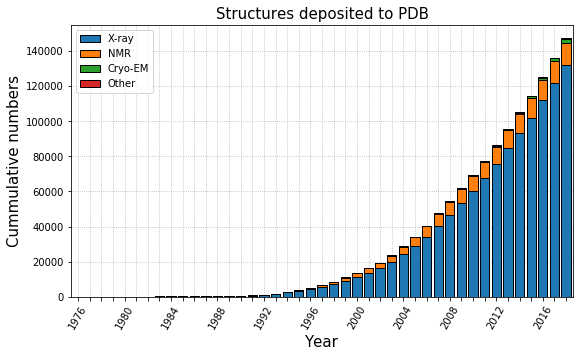

In [7]:
#part e
print("\npart e")
plt.figure(figsize=(9,5))
plt.grid(axis='both', linestyle=':', zorder=0)
plt.bar(xCoord, df2['X-ray_total'], label="X-ray", edgecolor='k', zorder=3)
plt.xticks(xCoord, xCoord, rotation=60)
plt.bar(xCoord, df2['NMR_total'], label="NMR", 
        bottom=df2['X-ray_total'], edgecolor='k', zorder=3)
plt.bar(xCoord, df2['Cryo_total'], label="Cryo-EM", 
        bottom=df2['X-ray_total']+df2['NMR_total'], edgecolor='k', zorder=3)
plt.bar(xCoord, df2['other_total'], label="Other", 
        bottom=df2['X-ray_total']+df2['NMR_total']+df2['Cryo_total'], edgecolor='k', zorder=3)
plt.legend()
plt.xticks(xCoord, xLabels, rotation=60)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Cummulative numbers", fontsize=15)
plt.title("Structures deposited to PDB", fontsize=15)
plt.margins(x=0.005)
plt.show()


part f


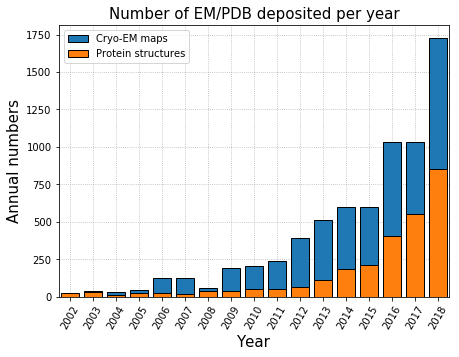

In [8]:
#part f
print("\npart f")
sorted_by_year = df['Year'].value_counts().sort_index()    #extracts counts indexed by years
years = sorted_by_year.index
groupby_year = sorted_by_year.values
#Another way
#years = np.sort(df['Year'].unique())
#groupby_year= np.array([df[df['Year']==i]['Year'].count() for i in years])
fig=plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
plt.bar(years, groupby_year, label="Cryo-EM maps", edgecolor='k', zorder=2)
plt.bar(years, df2['Cryo_annually'][16::-1], label="Protein structures", edgecolor='k', zorder=2)   #[16::-1] to exrtact years 2002-2018 only in increasing order
plt.xticks(years,years,rotation=60)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Annual numbers", fontsize=15)
plt.title("Number of EM/PDB deposited per year", fontsize=15)
plt.legend()
plt.grid(axis='both', linestyle=':',zorder=0)
plt.margins(x=0.005)
plt.show()


part g


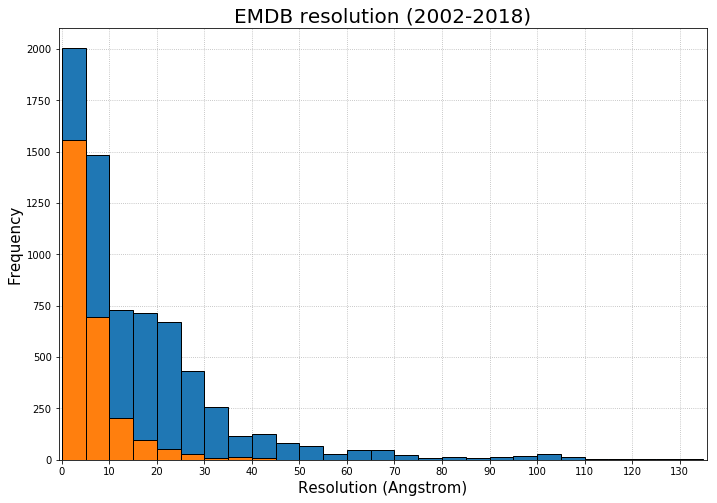

In [9]:
#part g
print("\npart g")
#set up main figure
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,1,1])
fig.set_figheight(6)
fig.set_figwidth(9)
#Total (all) maps
xcoord = np.arange(0,140,5)         #bins [0,5), [5,10), [10,15)....
#plot the main histogram (blue bars)
ax.hist(df['Resolution'], bins=xcoord, edgecolor='k', zorder=3)
notNullPDB = df[df['Associated_PDB'].notnull()]['Resolution']   #keep resolution entries that have an associated PDB
#plot PDB entries in orange
ax.hist(notNullPDB, bins=xcoord, edgecolor='k', zorder=3)
ax.set_xticks(np.arange(0,141,10))
ax.set_title("EMDB resolution (2002-2018)", fontsize=20)
ax.set_xlabel("Resolution (Angstrom)", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
ax.grid(axis='both', linestyle=':',zorder=0)
ax.margins(x=0.005)

In [13]:
#find the distribution of the resolution of the entries
df_2018 = df[df['Year']==2018]['Resolution']
df_2017 = df[df['Year']==2017]['Resolution']
df_less2012 = df[df['Year']<2013]['Resolution']
#Maps released in 2018
inner2018 = fig.add_axes([0.68,0.2,0.38,0.33])
inner2018.set_xlim(0,140)
inner2018.hist(df_2018, bins=xcoord, edgecolor='k', zorder=3)
inner2018.set_title("2018")
inner2018.set_xticks(np.arange(0,150,20))
inner2018.grid(axis='both', zorder=0)

In [14]:
#maps released in 2017
inner2017 = fig.add_axes([0.68,0.65,0.38,0.33])
inner2017.set_xlim(0,140)
inner2017.hist(df_2017, bins=xcoord, edgecolor='k', zorder=3)
inner2017.set_title("2017")
inner2017.set_xticks(np.arange(0,150,20))
inner2017.grid(axis='both', zorder=0)

In [15]:
#maps released before 2013
inner2012 = fig.add_axes([0.25,0.65,0.38,0.33])
inner2012.set_xlim(0,140)
inner2012.hist(df_less2012, bins=xcoord, edgecolor='k', zorder=3)
inner2012.set_title("2002-2012")
inner2012.set_xticks(np.arange(0,150,20))
inner2012.grid(axis='both', zorder=0)

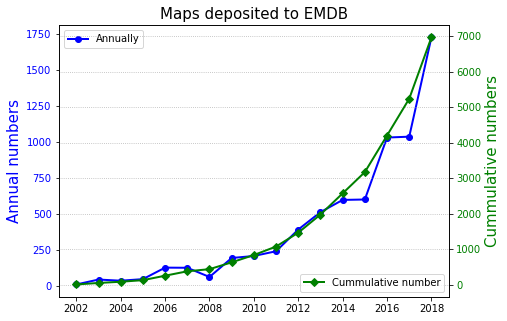

In [11]:
#Bonus
#plot the total number of maps and annual deposition
fig=plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
acc_year = groupby_year.cumsum()
plt.plot(years, groupby_year, 'bo-', linewidth=2.0, label="Annually")
plt.ylabel("Annual numbers", color='b', fontsize=15)
plt.yticks(color='b')
plt.legend(loc=2)
plt.twinx()
plt.plot(years, acc_year, 'gD-', linewidth=2.0, label="Cummulative number",zorder=3)
plt.ylabel("Cummulative numbers", color='g', fontsize=15)
plt.xlabel("Year")
plt.yticks(color='g')
plt.legend(loc=4)
plt.title("Maps deposited to EMDB", fontsize=15)
plt.xlabel("Year")
plt.grid(axis='both', linestyle=':',zorder=0)
plt.show()

Please enter the cutoff value: 100


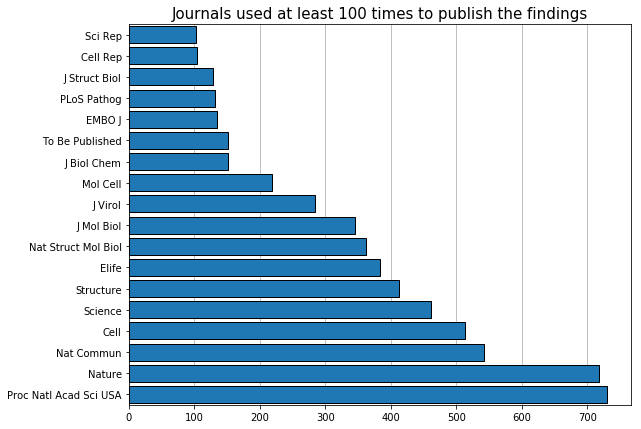

In [16]:
#bar chart
fig=plt.figure()
fig.set_figheight(7)
fig.set_figwidth(9)
x = int(input("Please enter the cutoff value: "))
journals = df['Journal'].value_counts()
journals_counts = journals[journals.values>=x]
journals_names = journals.index[:len(journals_counts)]
plt.barh(journals_names, journals_counts, edgecolor='k', zorder=3)
plt.title("Journals used at least " + str(x) + " times to publish the findings", fontsize=15)
plt.grid(axis='x')
plt.margins(y=0.005)
plt.show()